## Adding spotify-style analysis cards 

The goal is to add a feature to the app where users see their summaries in a more "entertaining" way - like the cards from spotify wrapped:

![example cards](images/spotify_wrapped.png)

Some ideas for cards:
 
1. Most popular food entry
2. Total calories (e.g you ate eough calories to fuel a home for 3 weeks or something ridiculous/relatable)
3. total carbs - "500 slices of bread worth of carbs"
4. total protein - "200 chickens worth of protein"
5. average adherence - within 10% of your calories goals for 90% of the days 

Lets start with generating a card for total calories:

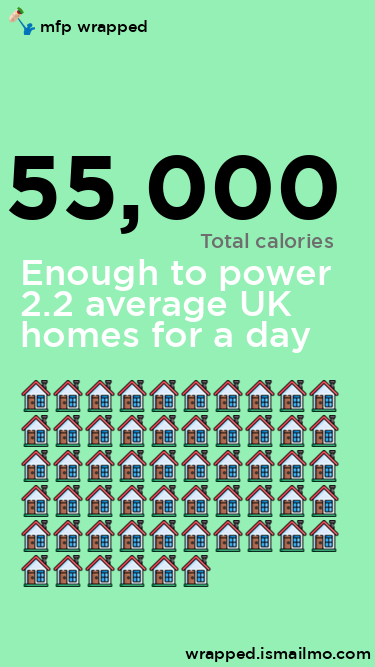

In [109]:
from PIL import Image, ImageDraw, ImageFont
import math

# create base card
card_width = 375
card_height = 667
im = Image.new(mode='RGB', size=(card_width,card_height), color=(148,240,180))
draw = ImageDraw.Draw(im)

# add mfp wrapped icon and text
icon_fnt = ImageFont.truetype("/home/ismail/.local/share/fonts/GothamMedium.ttf", 16)
icon = Image.open("../app/images/mfp-icon.png")
icon = icon.resize((30,30))
im.paste(icon, (5,5), icon)
draw.text((40,20), "mfp wrapped", font=icon_fnt, fill=(0,0,0))

# add wrapped website
draw.text((card_width-190,card_height-20), "wrapped.ismailmo.com", font=icon_fnt, fill=(0,0,0))

# add total figure
num_kcal = 55_000
title_fnt = ImageFont.truetype("/home/ismail/.local/share/fonts/GothamBold.ttf", 90)
draw.text((5,(card_height/2)-180), f"{num_kcal:,}", font=title_fnt, fill=(0,0,0))

# compare with household power consumption
kcal_fnt = ImageFont.truetype("/home/ismail/.local/share/fonts/GothamMedium.ttf", 20)
fnt = ImageFont.truetype("/home/ismail/.local/share/fonts/GothamMedium.ttf", 36)
#  https://shrinkthatfootprint.com/average-household-electricity-consumption/
# average household usage = 29kwH = 25000 kcal
household_daily_usage_kcal = 25_000
num_homes = num_kcal/household_daily_usage_kcal
draw.text((200,(card_height/2)-100), "Total calories", font=kcal_fnt, fill=(110,110,110))

draw.text((20,(card_height/2)-75), f"Enough to power "\
     f"\n{num_homes} average UK\nhomes for a day", font=fnt)

num_homes=56
# add home icons
home_img = Image.open("../app/images/home.png")

home_imgs_top = 380

num_cols = 4
num_rows = math.ceil(num_homes/num_cols)
home_img_width = 80
w_pad = 3
total_width = (home_img_width + w_pad) * num_cols
total_height = (home_img_width * num_rows) + home_imgs_top 
home_img.thumbnail((home_img_width,home_img_width))

avail_height = card_height-home_imgs_top -50
avail_width = card_width-20

height_clash = (total_height>avail_height)
width_clash =  (total_width>avail_width)

while height_clash or width_clash:
     if height_clash:
          # increasing cols wont help for width clash
          num_cols += 1
     
     max_width_per_home = avail_width/ num_cols
     home_img_width = int(max_width_per_home - w_pad)
     num_rows = math.ceil(num_homes/num_cols)
     total_width = (home_img_width + w_pad) * num_cols
     total_height = (home_img_width * num_rows) 
     home_img.thumbnail((home_img_width,home_img_width))
     height_clash = (total_height>avail_height)
     width_clash =  (total_width>avail_width)

home_imgs = [home_img for _ in range(math.ceil(num_homes))]
fraction = num_homes %1
if fraction >0:
    card_width = home_img.size[0]
    home_imgs[-1] = home_img.crop((0,0,int(card_width*fraction),100))

for idx, home in enumerate(home_imgs):
    row = (idx//num_cols)
    col = idx%num_cols
    im.paste(home, (20+(home_img_width*col),(row*(w_pad+home_img_width))+home_imgs_top), home)

display(im)

Generate top 5 list of food entries

In [2]:


# extract card creation into func
def create_base_card(color, font_path, icon_path,height=667, width=375):
    # create base card
    im = Image.new(mode='RGB', size=(width,height), color=color)
    draw = ImageDraw.Draw(im)

    # add mfp wrapped icon and text
    icon_fnt = ImageFont.truetype(font_path, 16)
    icon = Image.open(icon_path)
    icon = icon.resize((30,30))
    im.paste(icon, (5,5), icon)
    draw.text((40,20), "mfp wrapped", font=icon_fnt, fill=(0,0,0))

    # add wrapped website
    draw.text((width-190,height-20), "wrapped.ismailmo.com", font=icon_fnt, fill=(0,0,0))
    return (draw, im)

# replace this with the real data in the final app
top_entries= {1:("chicken", 500), 2:("bread", 450),3:("apple", 440),4:("coffee", 420),5:("chocolate", 350)}

font_path  ="/home/ismail/.local/share/fonts/GothamMedium.ttf"
icon_path = "../app/images/mfp-icon.png"

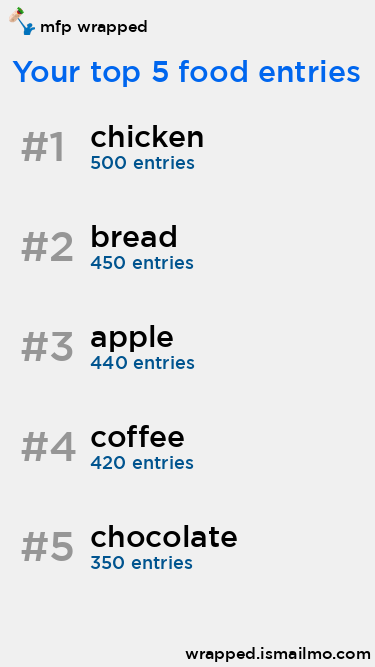

In [3]:
draw, top5_card = create_base_card((240,240,240), font_path, icon_path)

head_fnt = ImageFont.truetype(font_path, 30)
num_fnt = ImageFont.truetype(font_path, 42)
food_fnt = ImageFont.truetype(font_path, 30)
qty_fnt = ImageFont.truetype(font_path, 18)

draw.text((12, 60), "Your top 5 food entries", fill=(0,102,238), font=head_fnt)

for rank, (food, qty) in top_entries.items():
    draw.text((20, (rank*100)+ 30), f"#{rank}", fill=(150,150,150), font=num_fnt)
    draw.text((90, (rank*100)+ 25), food, fill=(0,0,0), font=food_fnt)
    draw.text((90, (rank*100)+ 55), f"{qty} entries", fill=(0,84,143), font=qty_fnt)

display(top5_card)

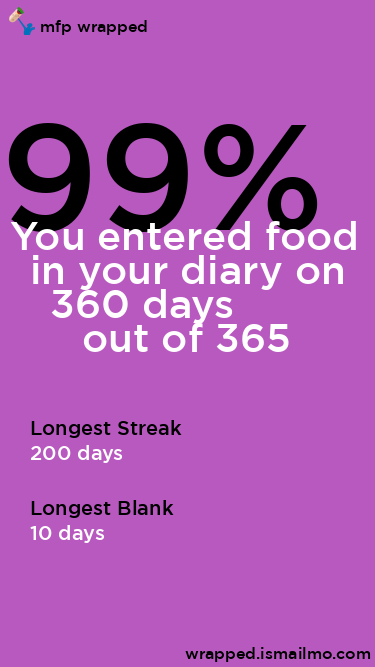

In [189]:
draw, days_tracked_card = create_base_card((184,89,192), font_path, icon_path)

tracked_days = 360
total_days = 365
perc_days= tracked_days/total_days

perc_font =  ImageFont.truetype(font_path, 150)
draw.text((0, 120), f"{perc_days*100:.0f}%", font=perc_font, fill=(0,0,0,200))

font =  ImageFont.truetype(font_path, 40)
draw.text((10, 220), f"You entered food\n\tin your diary on\n\t\t{tracked_days} days\n\t\t\t out of {total_days} ", font=font)

streak_font =  ImageFont.truetype(font_path, 20)
longest_streak = 200
draw.text((30, 420), "Longest Streak", font=streak_font, fill=(0,0,0))
draw.text((30, 445), f"{longest_streak} days", font=streak_font)
 
longest_blank = 10
draw.text((30, 500), "Longest Blank", font=streak_font, fill=(0,0,0))
draw.text((30, 525), f"{longest_blank} days", font=streak_font)

display(days_tracked_card)

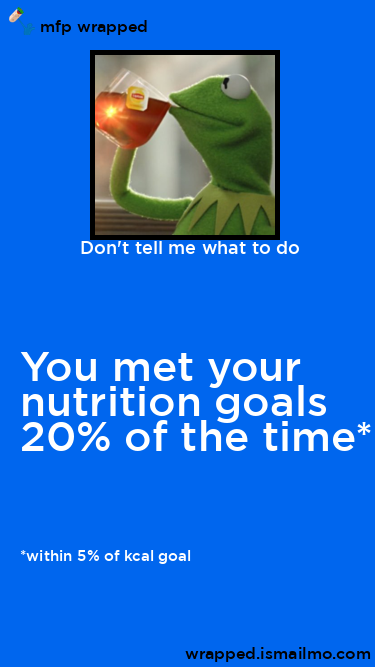

In [244]:
from PIL import ImageOps

draw, adherence_card = create_base_card((0,102,238), font_path, icon_path)

phrase_imgs = (
            ("Don't tell me what to do","../app/images/kermit.jpg"),
            ("Sometimes Maybe Good,\nSometimes Maybe Shit","../app/images/gattuso.png"), 
            ("Mr Consistent","../app/images/checklist.jpg")
            )

def get_adherence_level(adherence_perc:float):
    if adherence_perc<0.3:
        return 0
    if adherence_perc>0.7:
        return 2
    return 1
    
adherence = 0.1
threshold_lvl = get_adherence_level(adherence)
phrase_font =  ImageFont.truetype(font_path, 18)

draw.text((80, 240), phrase_imgs[threshold_lvl][0], font=phrase_font, align="center")

meme_img = Image.open(phrase_imgs[threshold_lvl][1])
meme_img.thumbnail((180,180))
meme_img_border = ImageOps.expand(meme_img, border=5, fill=(0,0,0))
adherence_card.paste(meme_img_border, (90,50))

adherence_font =  ImageFont.truetype(font_path, 42)
draw.text((20, 350), f"You met your\nnutrition goals\n{20}% of the time*", font=adherence_font)

disclaimer_font =  ImageFont.truetype(font_path, 15)
draw.text((20, 550), "*within 5% of kcal goal", font=disclaimer_font)

display(adherence_card)